In [17]:
# 基本数据load库
import pandas as pd
import numpy as np

In [18]:
df_train = pd.read_csv('data/train_1.csv')
df_test = pd.read_csv('data/test_1.csv')
y_train = df_train['pm2.5']
df_train.drop(columns=['pm2.5'], inplace=True)
x_train = df_train.values
x_test = df_test.values

In [23]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
lr = LinearRegression()
dtr = DecisionTreeRegressor()
svr_rbf = SVR(kernel='rbf', gamma='auto')
knr = KNeighborsRegressor()
ridge = Ridge()
lasso = Lasso()
regression_models = [lr, dtr, svr_rbf, knr, ridge, lasso]

In [20]:
# 划分测试集和验证集
from sklearn.model_selection import train_test_split 
x_tra, x_val, y_tra, y_val = train_test_split(x_train, y_train, random_state=2019, test_size=0.2)

In [24]:
from mlxtend.regressor import StackingCVRegressor
sclf = StackingRegressor(regression_models, meta_regressor=ridge)
sclf.fit(x_tra, y_tra)

StackingRegressor(meta_regressor=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
         refit=True,
         regressors=[LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False), DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
         ...ve=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)],
         store_train_meta_features=False, use_features_in_secondary=False,
         verbose=0)

In [22]:
# 评价模型
from sklearn.metrics import mean_squared_error
pred = sclf.predict(x_val)
print("MSE is {}".format(mean_squared_error(y_val, pred)))

MSE is 2912.423916083915


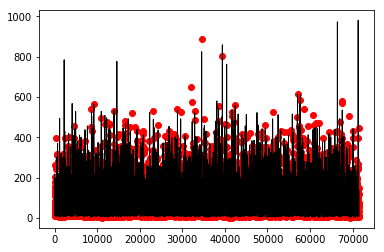

In [61]:
# 回归模型可视化
import matplotlib.pyplot as plt

plt.scatter([i*10 for i in range(len(y_val))], y_val, c='red', lw=1)
plt.plot([i*10 for i in range(len(y_val))], pred, c='black', lw=1)
plt.show()

In [62]:
result = sclf.predict(x_test)
rst = pd.DataFrame({'pm2.5': result})
rst.to_csv('data/result.csv', index=False)